In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
wine.shape

(1599, 12)

In [8]:
type(wine)

pandas.core.frame.DataFrame

In [9]:
wine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
879,7.2,0.6,0.04,2.5,0.076,18.0,88.0,0.99745,3.53,0.55,9.5,5


In [11]:
wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [12]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
#This is a classification problem since the target variable/label column has categorical type of data.

wine['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [18]:
# Checking the '0' values in the dataset

(wine==0).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [19]:
# Citric Acid has 132 values of '0'


EDA (Exploratory Data Analysis)


Scatterplot:



<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

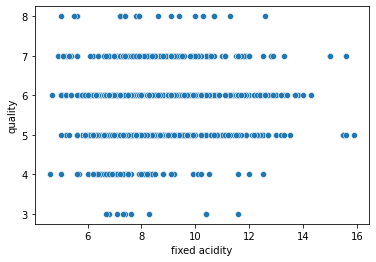

In [22]:
sns.scatterplot()
sns.scatterplot(x="fixed acidity", y="quality", data= wine)

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

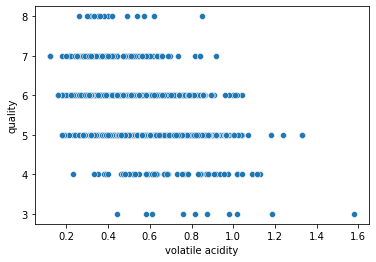

In [23]:
sns.scatterplot(x="volatile acidity", y="quality", data= wine)


<AxesSubplot:xlabel='citric acid', ylabel='quality'>

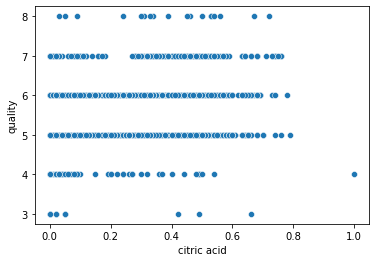

In [24]:
sns.scatterplot(x="citric acid", y="quality", data= wine)


<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

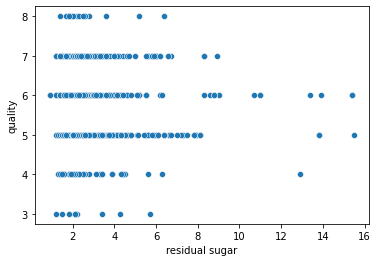

In [25]:
sns.scatterplot(x="residual sugar", y="quality", data= wine)


<AxesSubplot:xlabel='chlorides', ylabel='quality'>

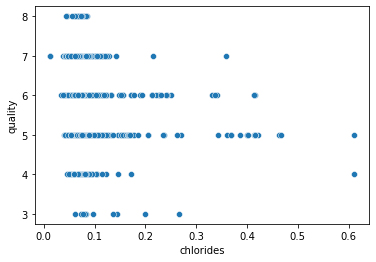

In [26]:
sns.scatterplot(x="chlorides", y="quality", data= wine)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

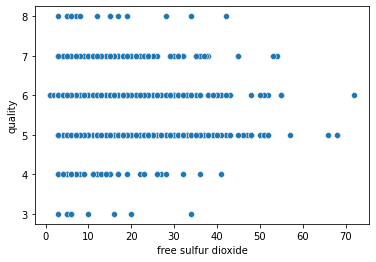

In [27]:
sns.scatterplot(x="free sulfur dioxide", y="quality", data= wine)


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

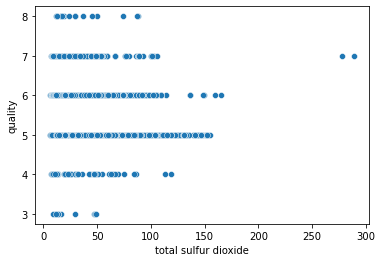

In [28]:
sns.scatterplot(x="total sulfur dioxide", y="quality", data= wine)


<AxesSubplot:xlabel='density', ylabel='quality'>

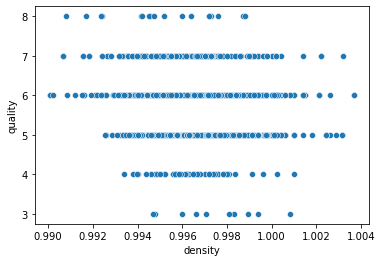

In [29]:
sns.scatterplot(x="density", y="quality", data= wine)


<AxesSubplot:xlabel='pH', ylabel='quality'>

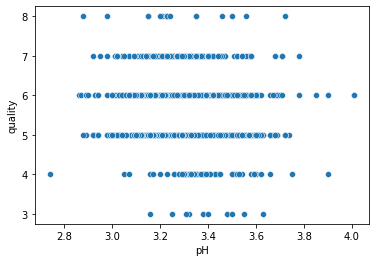

In [30]:
sns.scatterplot(x="pH", y="quality", data= wine)


<AxesSubplot:xlabel='sulphates', ylabel='quality'>

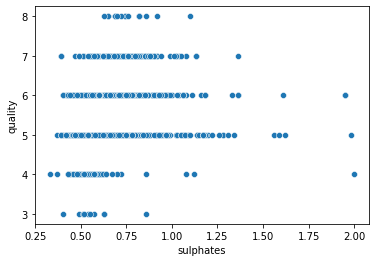

In [31]:
sns.scatterplot(x="sulphates", y="quality", data= wine)


<AxesSubplot:xlabel='alcohol', ylabel='quality'>

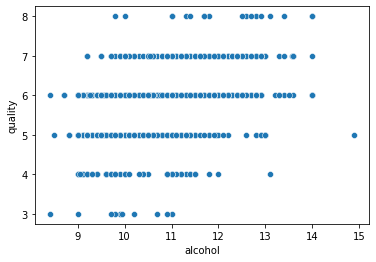

In [32]:
sns.scatterplot(x="alcohol", y="quality", data= wine)


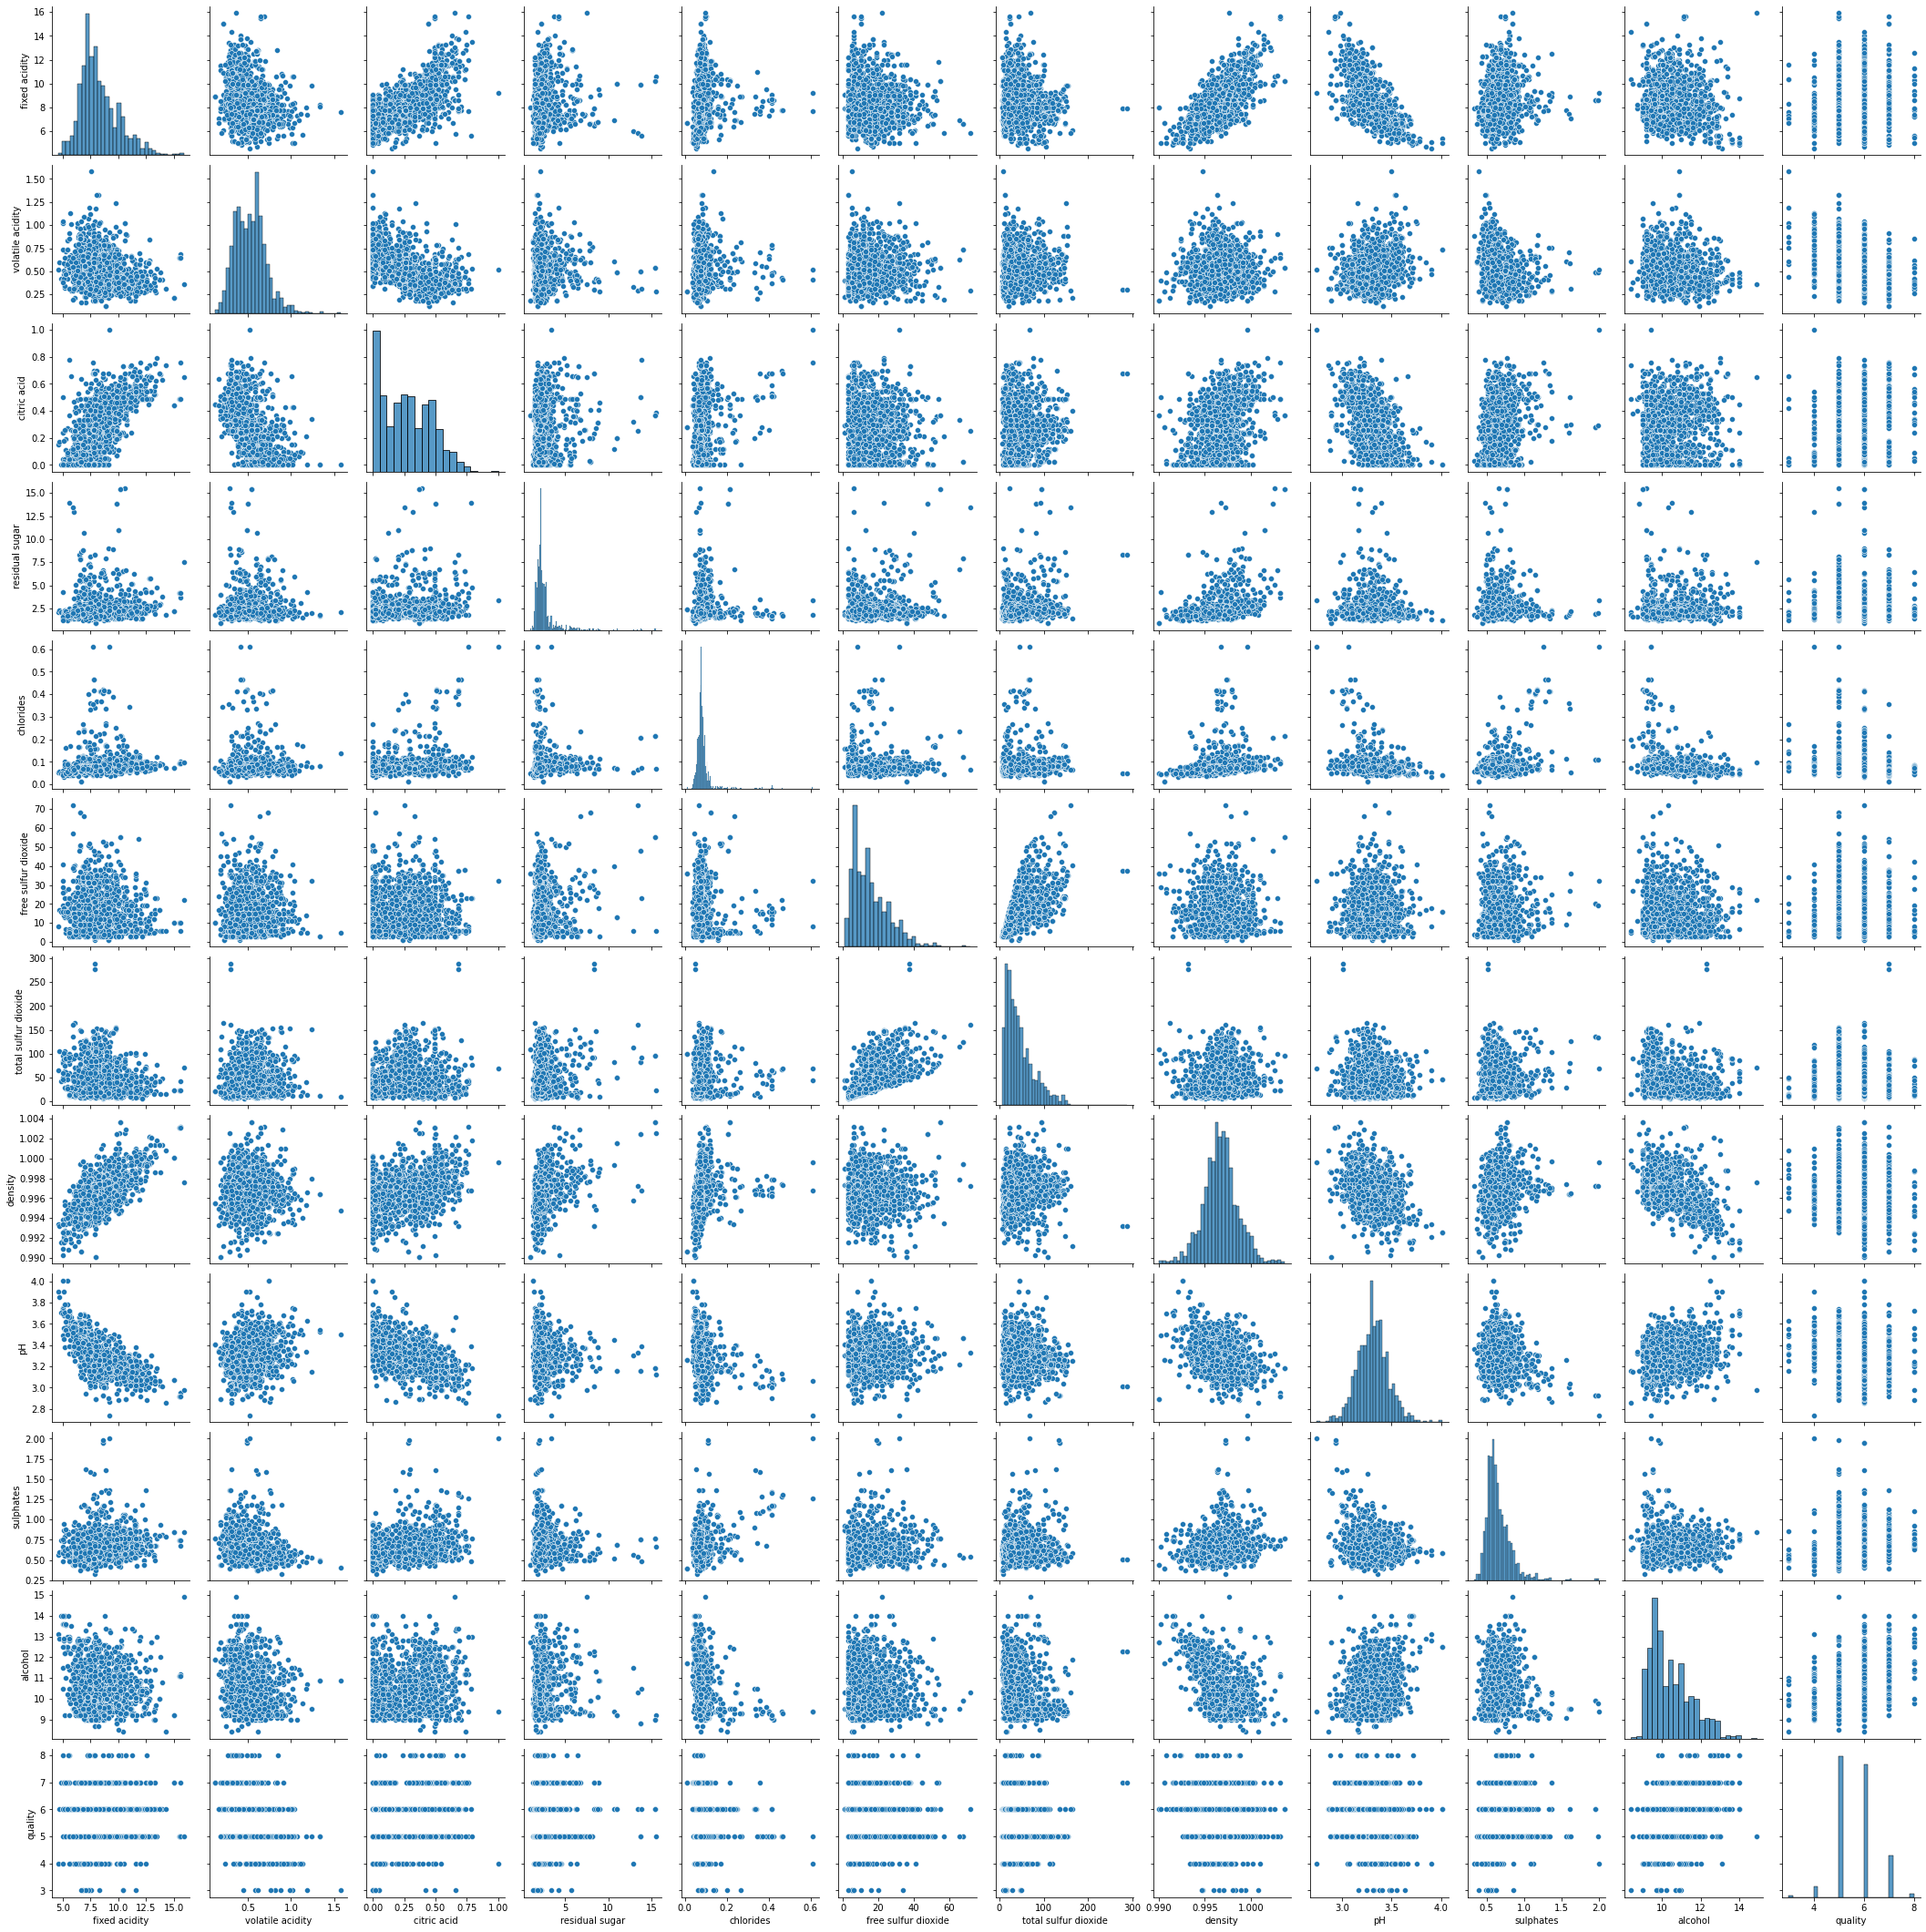

In [33]:
sns.pairplot(wine)
plt.show()


<AxesSubplot:xlabel='quality', ylabel='count'>

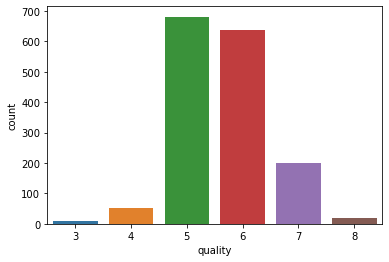

In [36]:
# Checking relationship between Dependent and Independent variables
x = wine.drop(columns = ['quality'])
y = wine['quality']
# Checking for class imbalance

sns.countplot(wine['quality'])
#  Class 5,6 carry the most of values and 3,4,7,8 carry minimum values.


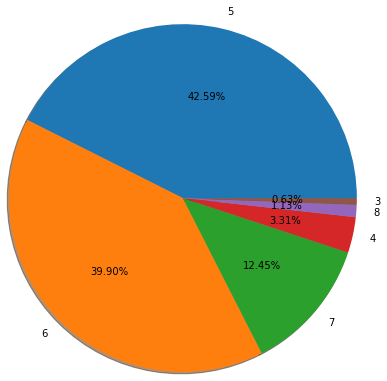

In [37]:
labels = '5','6','7','4','8','3'

fig, ax = plt.subplots()

ax.pie(wine['quality'].value_counts(),labels = labels,radius = 2, autopct = '%1.2f%%', shadow = True)

plt.show()

using above chart and graph we can understand that all values falls under 5 or below 5 those are in not good category however for those falling grater than 5 is "Good" category. Good is encoding with '1' and not good '0'

In [38]:
wine['quality'] = np.where((wine['quality'] <=5),0,1)
wine['quality'].unique()

array([0, 1])

<AxesSubplot:xlabel='quality', ylabel='count'>

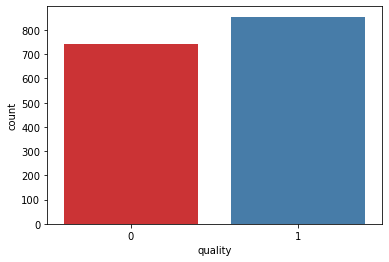

In [39]:
sns.countplot(wine['quality'], palette = "Set1")

-Class '1' has 6.94% more values than class'0', now there is not any substantial inbalance in data distribution between the 2 classes.



Data Visualization


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

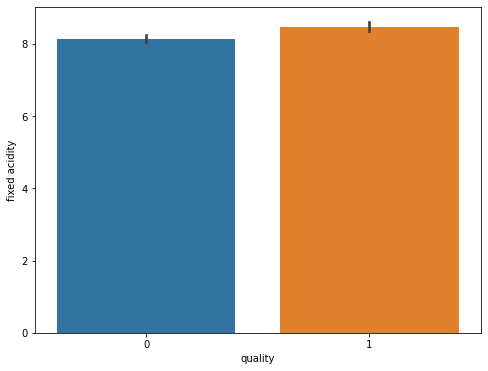

In [40]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

we observed fixed acidity does not give any specification to classify the quality



<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

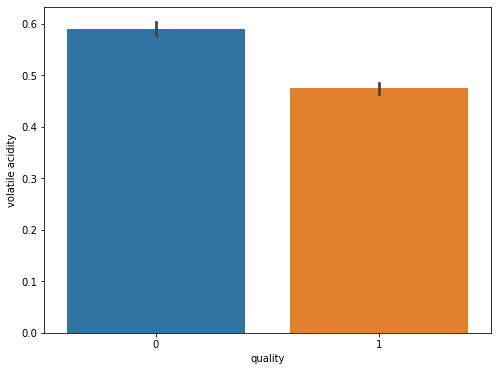

In [41]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

Here we see that its quite a downing trend in the volatile acidity as we go higher the quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

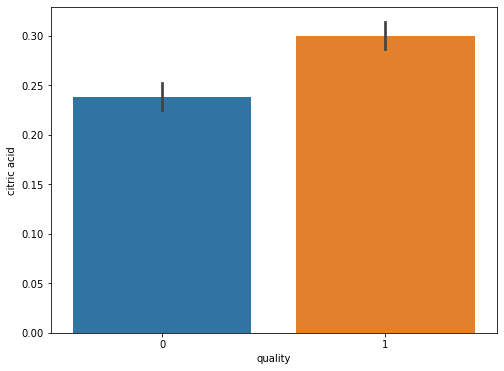

In [42]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

citric acid go higher as we go higher in the quality of the wine


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

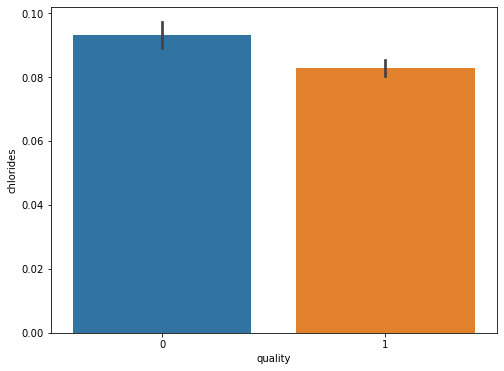

In [43]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

Composition of chloride also go down as we go higher in the quality of the wine


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

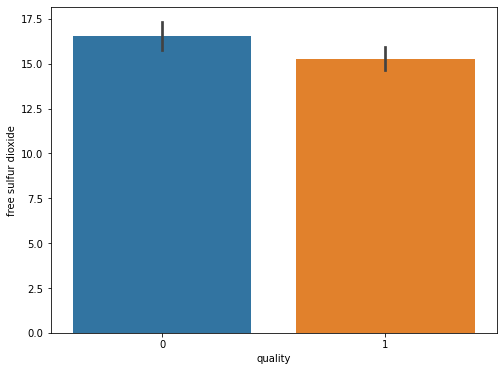

In [44]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

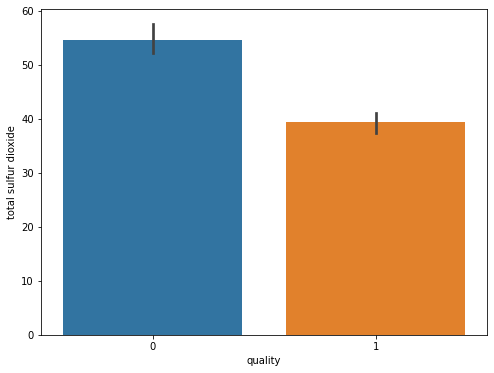

In [45]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

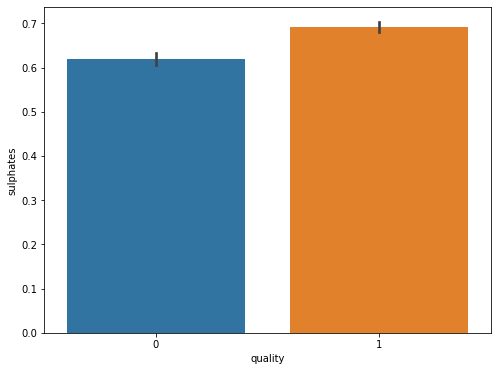

In [46]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

Sulphates level goes higher with the quality of wine


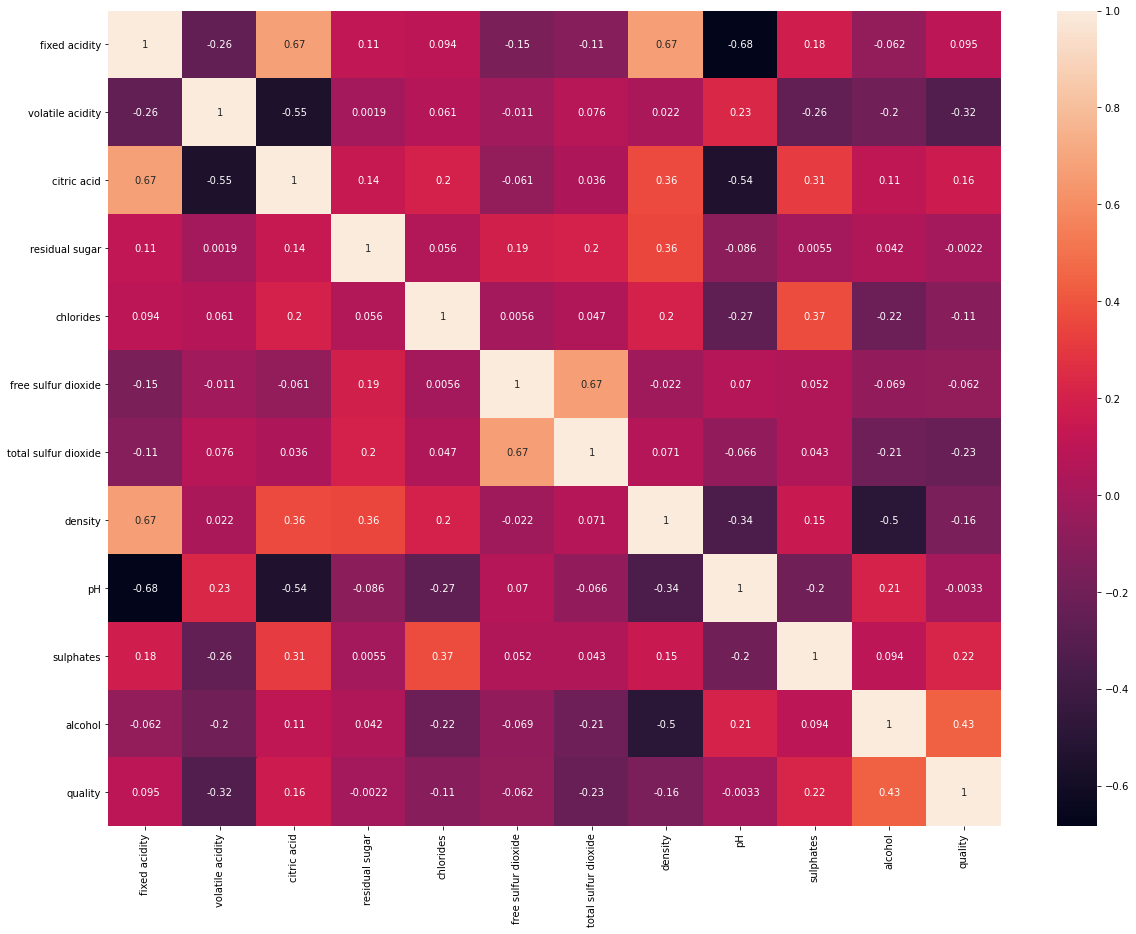

In [47]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(wine.corr(),annot = True)
plt.show()

Feature like 'Alcohol','Sulphates' have a good positive correlation with 'quality' while 'volatile acidity' 'total sulfur dioxide' have a significiant negative correlation with 'quality'.

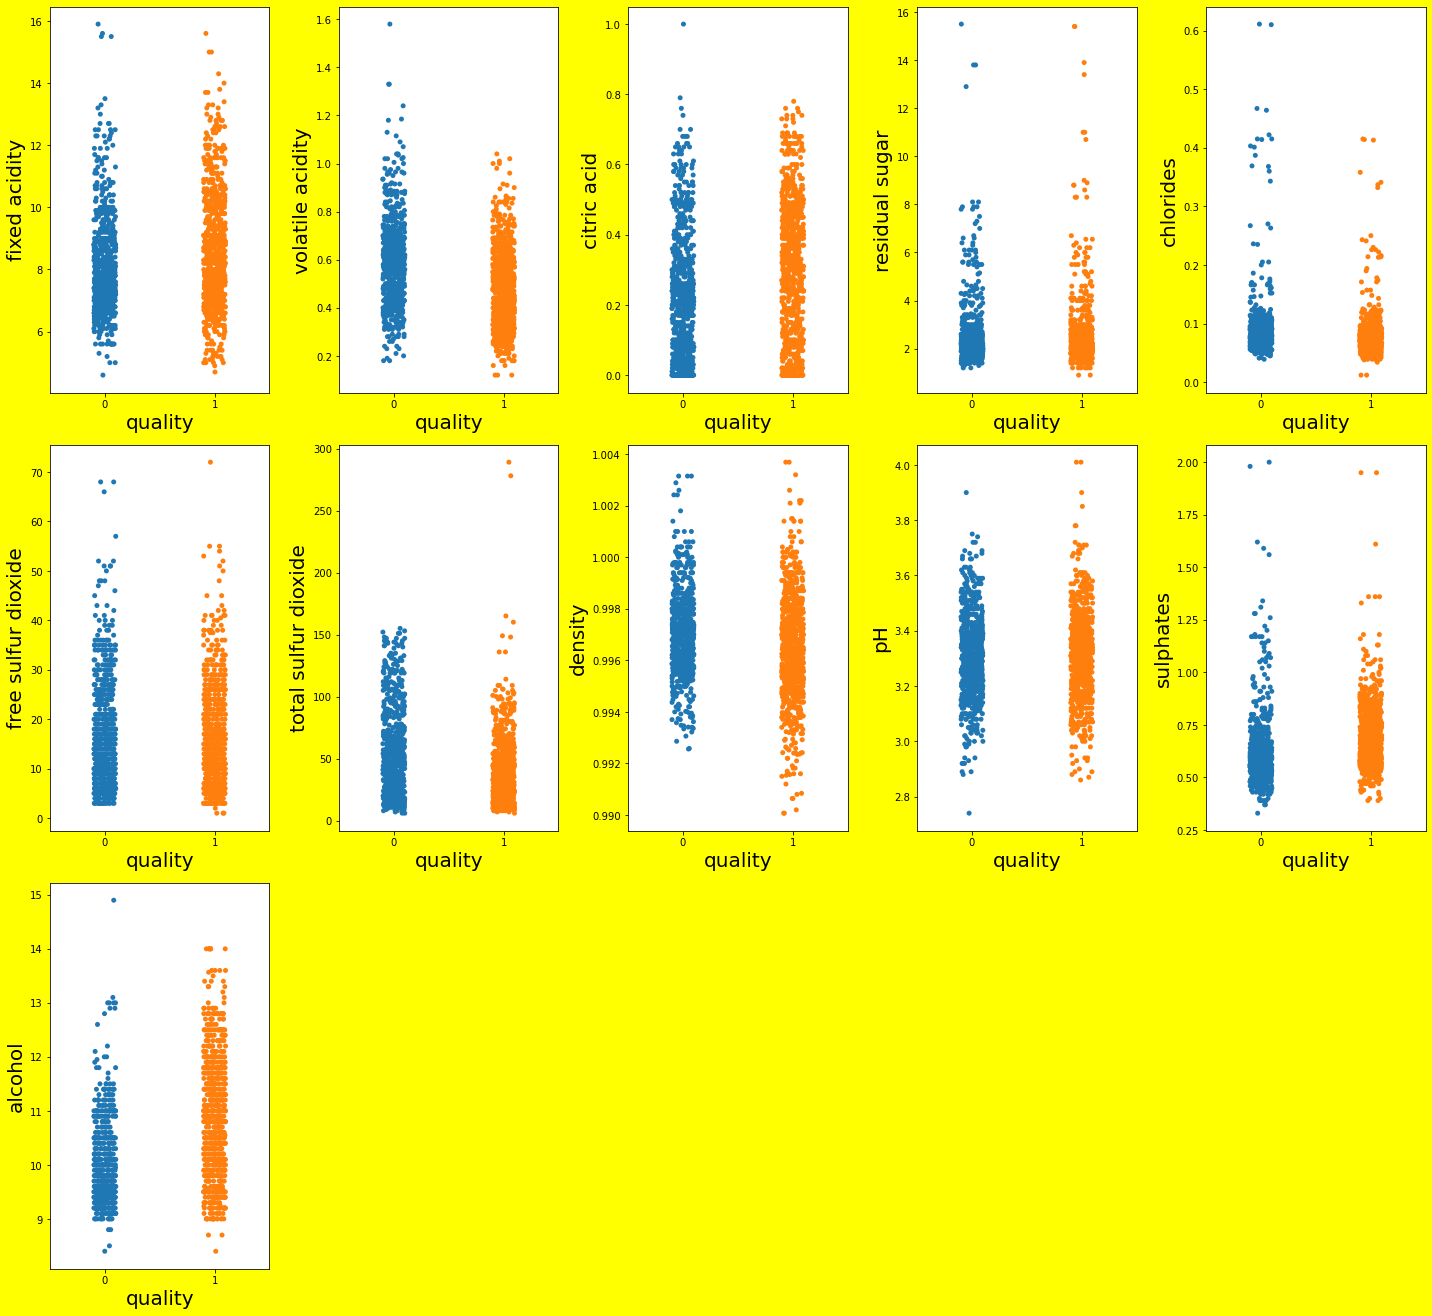

In [48]:
#interpreting relationship between independent variables and dependent class
plt.figure(figsize = (20,30), facecolor = 'yellow')
plotnum = 1

y = wine['quality']
for col in x:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,x[col])
        plt.xlabel('quality',fontsize = 20)
        plt.ylabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

From the above graph it can understanable that "Alcohol" and "Volatile Acidity" are good indicators of wine quality, but "PH" and "Residual Sugar" do not help in clearly distinguishing good quality wine from subpar wine

In [49]:
# checking skewness
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

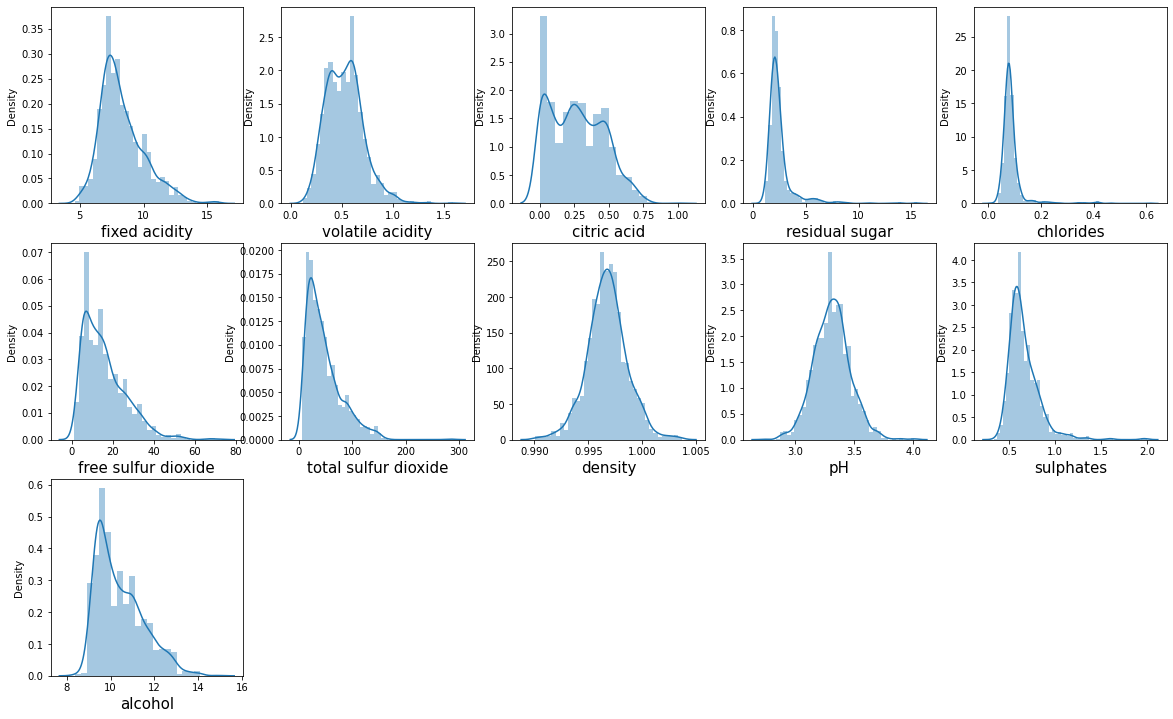

In [50]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

Sulphates, fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, alchohol are all right skewed distributions.



<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

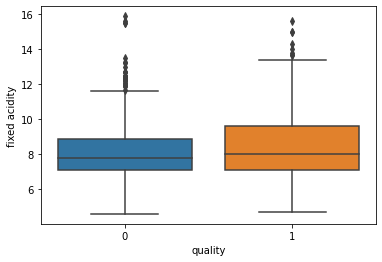

In [51]:
# Plot a boxplot to check for Outliers
# Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

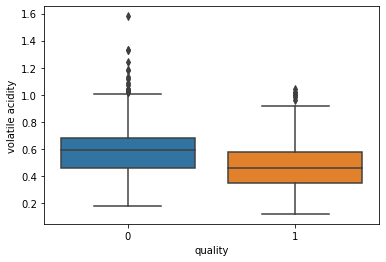

In [52]:
sns.boxplot('quality', 'volatile acidity', data = wine)


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

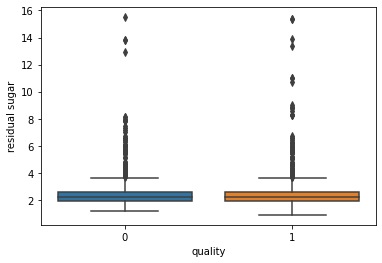

In [53]:
sns.boxplot('quality', 'residual sugar', data = wine)


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

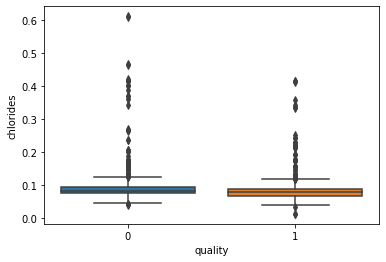

In [54]:
sns.boxplot('quality', 'chlorides', data = wine)


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

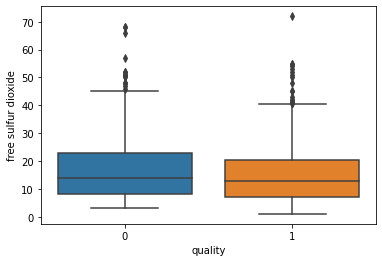

In [55]:
sns.boxplot('quality', 'free sulfur dioxide', data = wine)


<AxesSubplot:xlabel='quality', ylabel='density'>

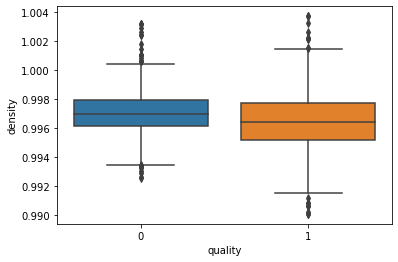

In [56]:
sns.boxplot('quality', 'density', data = wine)


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

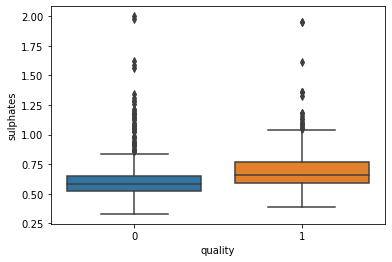

In [57]:
sns.boxplot('quality', 'sulphates', data = wine)


boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening -fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers -volatile acididty - similar reasoning -citric acid - seems to be somewhat uniformly distributed -residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers. -chlorides - same as residual sugar. Min - 0.012, max - 0.611 -free sulfur dioxide, total suflur dioxide - same explanation as above

Z score method to remove outliers


In [58]:
w= wine.copy()

from scipy.stats import zscore

zscor = zscore(w)
zabs = np.abs(zscor)
df = w[(zabs <3).all(axis=1)] #taking threshold value as 3
print(df.shape)

print(w.shape)

(1458, 12)
(1599, 12)


In [59]:
# Checking the dataloss in %

loss = (1599-1458)/1599*100
loss

8.818011257035648

In [60]:
# Compare skewness
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [61]:
df.skew()


fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                -0.159793
dtype: float64

In [62]:
# Reducing the skewness further
wine = df.copy()
feat = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

skewdf = wine[feat].copy()

#Trying log transform method

for col in skewdf:
    skewdf[col] = np.log(skewdf[col])
skewdf.skew()

fixed acidity           0.377100
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
sulphates               0.345344
alcohol                 0.588835
dtype: float64

In [63]:
# Trying power transform method

from sklearn.preprocessing import PowerTransformer

powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
df1 = wine[feat].copy()
df1.skew()

fixed acidity           0.820879
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [64]:
transformed = powtrans.fit_transform(df1)

transformed = pd.DataFrame(transformed, columns =df1.columns)
transformed.skew()

fixed acidity           0.019079
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
sulphates               0.021132
alcohol                 0.108436
dtype: float64

In [65]:
skewdf.skew()


fixed acidity           0.377100
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
sulphates               0.345344
alcohol                 0.588835
dtype: float64

In [66]:
transformed.index = wine.index
wine[feat] = transformed[feat]
x = wine.drop(columns = ['quality'])
y = wine['quality']
x.skew()

fixed acidity           0.019079
volatile acidity        0.392097
citric acid             0.292600
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                 0.055543
pH                      0.113039
sulphates               0.021132
alcohol                 0.108436
dtype: float64

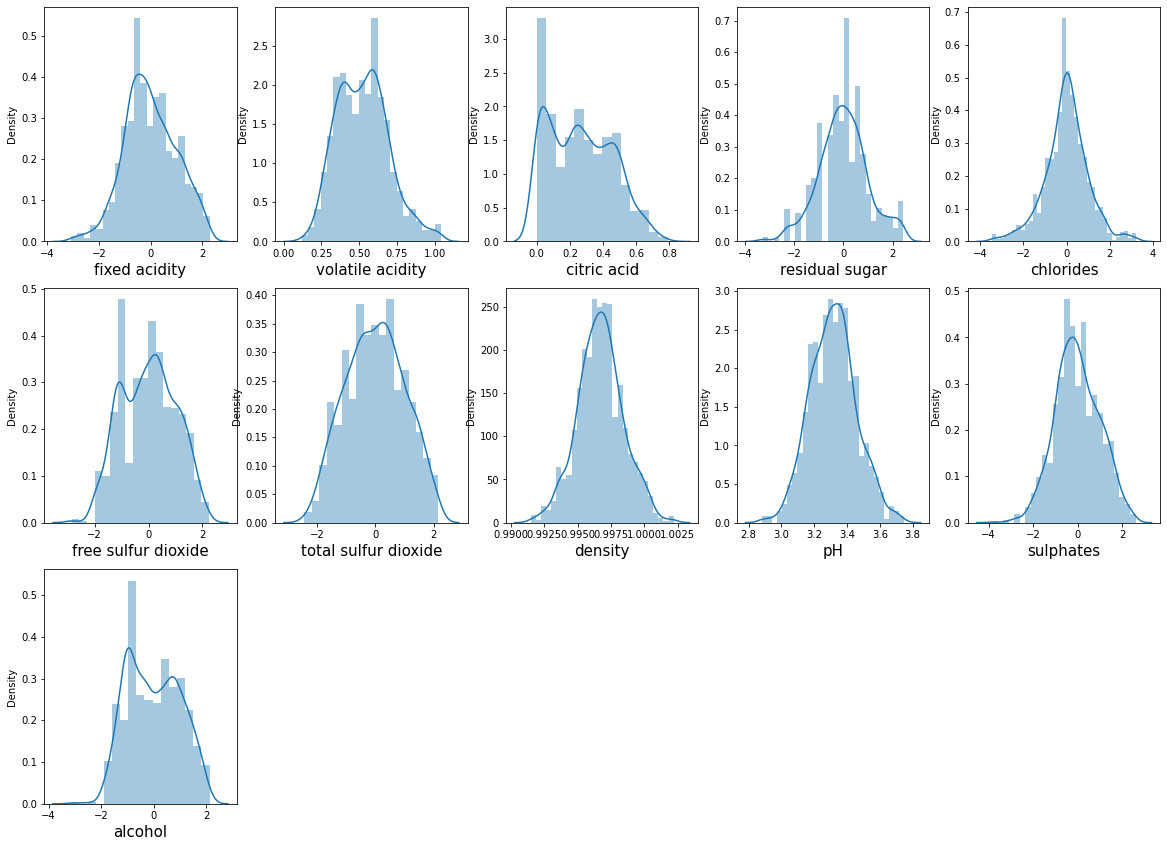

In [67]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

Data Standardization


In [68]:
#scale the data using StandardScalar for PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-0.46910218,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.58823037, -1.11232895],
       [-0.17212704,  2.10132549, -1.38741253, ..., -0.82375195,
         0.45352708, -0.52685366],
       [-0.17212704,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.71401945, -0.75981623, ...,  1.80028837,
         0.66861292, -0.03320546],
       [-1.77310975, -1.26362959,  1.07067297, ...,  0.52372821,
         0.30109116,  0.7428399 ]])

In [70]:
# Checking for Multicollinearity using Variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,fixed acidity,6.878090
1,volatile acidity,1.843893
2,citric acid,2.969303
3,residual sugar,1.687033
4,chlorides,1.264782
5,free sulfur dioxide,2.830927
6,total sulfur dioxide,3.159700
7,density,5.600673
8,pH,3.173526
9,sulphates,1.372701


PCA (Principal component Analysis )


In [71]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)


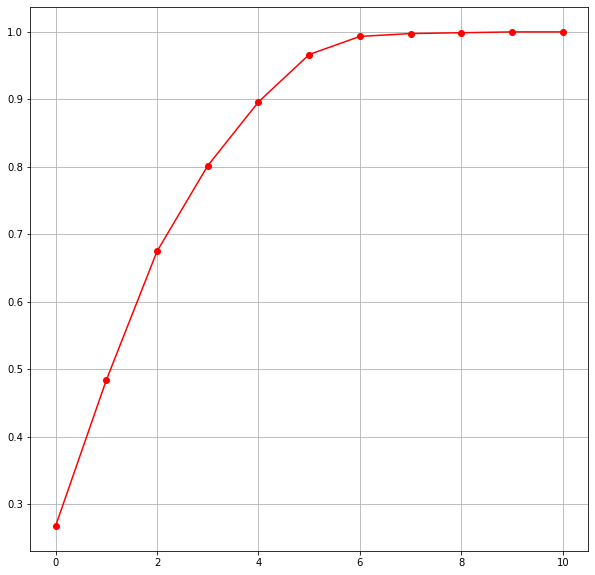

In [72]:
# plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data.

In [73]:
# PCA with 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)
x_new

array([[-0.19694243,  0.71791788,  1.24030223, ...,  0.43996057,
        -0.04106821, -0.19366464],
       [-1.68607426, -0.79832989, -0.18989895, ...,  0.16351266,
        -0.23245913, -0.38200569],
       [-0.87039797, -0.45864833,  0.24331083, ...,  0.21330711,
         0.14917114, -0.27524714],
       ...,
       [-0.86207684,  0.869296  , -1.51689075, ...,  0.08012324,
        -0.6414979 ,  0.04764785],
       [-1.33615204,  1.47507246, -0.81234097, ...,  0.28984495,
        -0.73473824,  0.01018267],
       [-0.48139881,  0.75591468, -1.47512032, ...,  0.94279727,
        -0.18526662,  0.4892006 ]])

Kbest feature selection


In [74]:
from sklearn.feature_selection import SelectKBest, f_classif
xbest = x.drop(columns = ['pH','residual sugar','fixed acidity'])
scaled_x = sc.fit_transform(xbest)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .31, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.834070796460177 on Random State: 90


In [76]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .30, random_state=i)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Data Modeling


In [77]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
LOGR.fit(x_train,y_train)
RFC.fit(x_train,y_train)
DTC.fit(x_train,y_train)
SV.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

Accuracy Score for each model


In [78]:
## Logistic Regression Model Accuracy
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[139  54]
 [ 69 176]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.67      0.72      0.69       193
           1       0.77      0.72      0.74       245

    accuracy                           0.72       438
   macro avg       0.72      0.72      0.72       438
weighted avg       0.72      0.72      0.72       438



In [79]:
# Random Forest Classifier Model Accuracy

RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[154  39]
 [ 61 184]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.72      0.80      0.75       193
           1       0.83      0.75      0.79       245

    accuracy                           0.77       438
   macro avg       0.77      0.77      0.77       438
weighted avg       0.78      0.77      0.77       438



In [80]:
# Decision Tree Classifier Model Accuracy
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[132  61]
 [ 63 182]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.68      0.68      0.68       193
           1       0.75      0.74      0.75       245

    accuracy                           0.72       438
   macro avg       0.71      0.71      0.71       438
weighted avg       0.72      0.72      0.72       438



In [81]:
# SV Classifier Model Accuracy
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[150  43]
 [ 73 172]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.67      0.78      0.72       193
           1       0.80      0.70      0.75       245

    accuracy                           0.74       438
   macro avg       0.74      0.74      0.73       438
weighted avg       0.74      0.74      0.74       438



In [82]:
# KNeighbors Classifier Model Accuracy
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)

print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[143  50]
 [ 67 178]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.68      0.74      0.71       193
           1       0.78      0.73      0.75       245

    accuracy                           0.73       438
   macro avg       0.73      0.73      0.73       438
weighted avg       0.74      0.73      0.73       438



Model Cross Validation


In [83]:
from sklearn.model_selection import cross_val_score as cvs

#Decision Tree Classifier
print("Decision Tree Classifier:" ,cvs(DTC,scaled_x,y,cv=5).mean())

#Logistic Regression
print("Logistic Regression:",cvs(LOGR,scaled_x,y,cv=5).mean())

# Random Forest Classifier
print(" Random Forest Classifier:",cvs(RFC,scaled_x,y,cv=5).mean())


# SV Classifier
print("SV Classifier:",cvs(SV,scaled_x,y,cv=5).mean())

#K Nearest Neighnors Classifier
print("K Nearest Neighnors Classifier:",cvs(KNN,scaled_x,y,cv=5).mean())

Decision Tree Classifier: 0.6604928682389493
Logistic Regression: 0.7215412135762369
 Random Forest Classifier: 0.7187826578166925
SV Classifier: 0.7174292708186226
K Nearest Neighnors Classifier: 0.687214611872146


ROC AUC Scores


In [84]:
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,DTCpred))

#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,LOGRpred))

#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,RFCpred))


#SV Classifier
print("SV Classifier:",roc_auc_score(y_test,SVpred))

#K Nearest Neighbors Classifier
print("K Nearest Neighbors Classifier:",roc_auc_score(y_test,KNNpred))

Decision Tree Classifier: 0.7133974833456699
Logistic Regression: 0.719287300412393
Random Forest Classifier: 0.7744739346515809
SV Classifier: 0.7396214444326954
K Nearest Neighbors Classifier: 0.7337316273659722


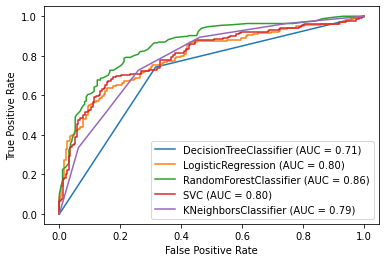

In [85]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,SV,KNN]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()


above graph says, Random Forest Classifier is the best model for the dataset with AUC score 0.86



In [102]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
Gridcv = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
Gridcv.fit(x_train,y_train)above graph says, Random Forest Classifier is the best model for the dataset with AUC score 0.86
Hyper Parameter Tuning
RandomForest Classifier

SyntaxError: invalid syntax (<ipython-input-102-5830da551ee3>, line 4)

In [100]:
Gridcv.best_params_

NameError: name 'Gridcv' is not defined

In [90]:
Best_mod = RandomForestClassifier(n_estimators = 60,criterion = 'entropy', max_depth= 60, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 5)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

75.11415525114155


In [91]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[153,  40],
       [ 69, 176]], dtype=int64)

Logistic Regression


In [92]:
parameter = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,5,10,20],'solver':['liblinear'],'max_iter':[100,200],'multi_class':['auto', 'ovr', 'multinomial']}
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 5, 10, 20],
                         'solver': ['liblinear']})

In [93]:
GridCV.best_params_


{'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [94]:
Best_mod2 = LogisticRegression(dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod2.fit(x_train,y_train)
lrpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

71.91780821917808


In [95]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[139,  54],
       [ 69, 176]], dtype=int64)

Random Forest Classifier also has better Confusion matrix performance than Logistic Regression Save the Model



In [96]:
import joblib
joblib.dump(Best_mod,"Best_Wine.pkl")

['Best_Wine.pkl']

In [97]:
mod = joblib.load("Best_Wine.pkl")
print(mod.predict(x_test))

[1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1]


In [98]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(y_test)
predicted = np.array(mod.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,0,1
1,1,1
2,1,1
3,1,0
4,0,0
...,...,...
433,1,1
434,0,0
435,0,0
436,0,0


the predicted and the true values

